## Predicting Diabetes using Machine Learning

We're going to take following approach:
1. Problem definition
2. Data
3. Evaluation metrics
4. Features
5. Modelling
6. Experimentation

### 1. Problem Definition
>The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

### 2. Data
>Dataset link: https://machinelearningmastery.com/standard-machine-learning-datasets/

### 3. Evaluation
>If we can reach 95% accuracy at predicting the onset of diabetes within 5 years in Pima Indians.

### 4. Features
Information regarding features of data.

Create data dictionary
* pregnant: Number of times pregnant.
* plasma: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
* dbl :Diastolic blood pressure (mm Hg).
* triceps: Triceps skinfold thickness (mm).
* insulin: 2-Hour serum insulin (mu U/ml).
* bmi: Body mass index (weight in kg/(height in m)^2).
* pedigree: Diabetes pedigree function.
* age: Age (years).
* class: Class variable (0 or 1).

In [1]:
# Importing the basic packages
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
# Load data
names = ["pregnant", "plasma","dbl","triceps","insulin","bmi",
         "pedigree","age","class"]
df = pd.read_csv("pima-indians-diabetes.csv",names=names)

In [6]:
df.head()

,pregnant,plasma,dbl,triceps,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# check for na values
df.isna().sum()

pregnant    0
plasma      0
dbl         0
triceps     0
insulin     0
bmi         0
pedigree    0
age         0
class       0
dtype: int64

In [9]:
# Data Frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   plasma    768 non-null    int64  
 2   dbl       768 non-null    int64  
 3   triceps   768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   class     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
# how many instances of each class
df["class"].value_counts() # Imbalanced data

0    500
1    268
Name: class, dtype: int64

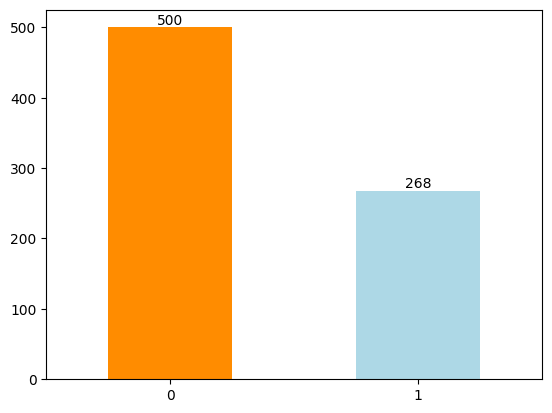

In [42]:
fig = df["class"].value_counts().plot(kind="bar", 
                                color = ["darkorange", "lightblue"],
                                rot = 0);
fig.bar_label(fig.containers[0]);

In [16]:
df.describe()

,pregnant,plasma,dbl,triceps,insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Modelling

In [17]:
from sklearn.model_selection import train_test_split

In [20]:
# split data into features[X] and labels[y]
X = df.drop(["class"], axis = 1)
y = df["class"]

In [21]:
X.head()

,pregnant,plasma,dbl,triceps,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [22]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [23]:
np.random.seed(42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

We're going to try 4 different models:
* LinearSVC
* KNeighbours
* Logistic Regression
* RandomForestClassifier

In [30]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [32]:
# model dictionary
models = {"Linear SVC":LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

# A function to fit and evaluate each model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and scores different models.
    models: dict of different models
    X_train: training data
    X_test: testing data
    y_train: training labels
    y_test: testing labels
    """
    model_scores ={}
    for name, model in models.items():
        # fit each model on training data
        model.fit(X_train, y_train)
        # evaluate each model and append to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [33]:
model_scores = fit_and_score(models = models, 
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train, 
                             y_test = y_test)

/home/ayushmaan/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/ayushmaan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
model_scores

{'Linear SVC': 0.6688311688311688,
 'KNN': 0.6623376623376623,
 'Logistic Regression': 0.7467532467532467,
 'Random Forest': 0.7532467532467533}

### Model Comparison

          Linear SVC       KNN  Logistic Regression  Random Forest
accuracy    0.668831  0.662338             0.746753       0.753247


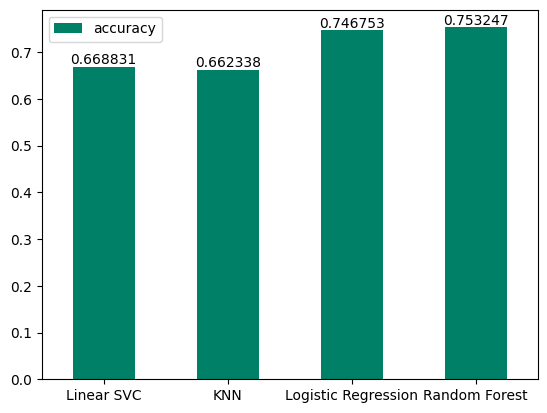

In [41]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
print(model_compare)
fig = model_compare.T.plot(kind = "bar",
                           cmap = "summer",
                           rot = 0)
fig.bar_label(fig.containers[0]);

## Hyperparameter tuning

### Using RandomizedSearchCV